In [27]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Open database connection
db = pymysql.connect("localhost","root","password",'sakila' )


In [29]:

# prepare a cursor object using cursor() method
cursor = db.cursor()


In [30]:

# execute SQL query using execute() method.
cursor.execute("SELECT VERSION()")


1

In [31]:

# Fetch a single row using fetchone() method.
data = cursor.fetchone()
print ("Database version : %s " % data)


Database version : 8.0.21 


# Theme
You are the store Data Analyst and Kirk is an investor 
looking to buy the stores. He has a few queries that would like 
to get answers for.



1. Kirk Gopal is looking to meet the staff in each store, let him know the address to meet them

In [32]:
df = pd.read_sql('''
SELECT 
	staff.first_name AS manager_first_name, 
    staff.last_name AS manager_last_name,
    address.address, 
    address.district, 
    city.city, 
    country.country

FROM store
	LEFT JOIN staff ON store.manager_staff_id = staff.staff_id
    LEFT JOIN address ON store.address_id = address.address_id
    LEFT JOIN city ON address.city_id = city.city_id
    LEFT JOIN country ON city.country_id = country.country_id

''', db);


In [33]:
print(df)



  manager_first_name manager_last_name             address district  \
0               Mike           Hillyer   47 MySakila Drive  Alberta   
1                Jon          Stephens  28 MySQL Boulevard      QLD   

         city    country  
0  Lethbridge     Canada  
1   Woodridge  Australia  


2. Kirk want to understand the inventory is in terms of replacement cost. He wants to see the impact 
if a certain category of film became unpopular at a certain store. He would like to see the number of films, 
as well as the average replacement cost, and total replacement cost, sliced by store and film category. 


In [34]:
df = pd.read_sql('''
SELECT 
	store_id, 
    category.name AS category, 
	COUNT(inventory.inventory_id) AS films, 
    AVG(film.replacement_cost) AS avg_replacement_cost, 
    SUM(film.replacement_cost) AS total_replacement_cost
    
FROM inventory
	LEFT JOIN film
		ON inventory.film_id = film.film_id
	LEFT JOIN film_category
		ON film.film_id = film_category.film_id
	LEFT JOIN category
		ON category.category_id = film_category.category_id

GROUP BY 
	store_id, 
    category.name
    
ORDER BY
    store_id,
    category.name,
	SUM(film.replacement_cost) DESC
''', db);


In [35]:
print(df)

    store_id     category  films  avg_replacement_cost  total_replacement_cost
0          1       Action    169             21.191183                 3581.31
1          1    Animation    161             20.387516                 3282.39
2          1     Children    129             19.990000                 2578.71
3          1     Classics    131             20.615954                 2700.69
4          1       Comedy    142             19.440704                 2760.58
5          1  Documentary    130             20.728462                 2694.70
6          1        Drama    162             21.934444                 3553.38
7          1       Family    157             20.537771                 3224.43
8          1      Foreign    153             18.558627                 2839.47
9          1        Games    128             21.130625                 2704.72
10         1       Horror    112             19.748929                 2211.88
11         1        Music    122             19.2850

Text(0, 0.5, 'Frequency')

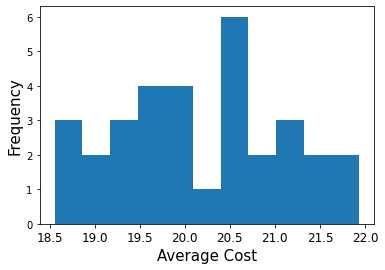

In [36]:
df['avg_replacement_cost'].hist(bins =11, grid = False, xlabelsize = 12)
plt.xlabel('Average Cost',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)


3. Kirk wants to the customer demographics. Please provide a list 
of all customer names, which store they go to, whether or not they 
are currently active, and their full addresses. 

In [37]:
df = pd.read_sql('''
SELECT 
	customer.first_name, 
    customer.last_name, 
    customer.store_id,
    customer.active, 
    address.address, 
    city.city, 
    country.country

FROM customer
	LEFT JOIN address ON customer.address_id = address.address_id
    LEFT JOIN city ON address.city_id = city.city_id
    LEFT JOIN country ON city.country_id = country.country_id
;

''', db);


In [38]:
print(df)

    first_name  last_name  store_id  active                   address  \
0         MARY      SMITH         1       1            1913 Hanoi Way   
1     PATRICIA    JOHNSON         1       1          1121 Loja Avenue   
2        LINDA   WILLIAMS         1       1         692 Joliet Street   
3      BARBARA      JONES         2       1          1566 Inegl Manor   
4    ELIZABETH      BROWN         1       1           53 Idfu Parkway   
..         ...        ...       ...     ...                       ...   
594   TERRENCE  GUNDERSON         1       1       844 Bucuresti Place   
595    ENRIQUE   FORSYTHE         1       1  1101 Bucuresti Boulevard   
596    FREDDIE     DUGGAN         1       1    1103 Quilmes Boulevard   
597       WADE   DELVALLE         1       1       1331 Usak Boulevard   
598     AUSTIN    CINTRON         2       1      1325 Fukuyama Street   

               city        country  
0            Sasebo          Japan  
1    San Bernardino  United States  
2           


4. Kirk would like to understand how much customers are 
spending with you, and also to know who your most top paying 
customers are.


In [39]:
df = pd.read_sql('''
SELECT 
	store_id, 
    category.name AS category, 
	COUNT(inventory.inventory_id) AS films, 
    AVG(film.replacement_cost) AS avg_replacement_cost, 
    SUM(film.replacement_cost) AS total_replacement_cost
    
FROM inventory
	LEFT JOIN film
		ON inventory.film_id = film.film_id
	LEFT JOIN film_category
		ON film.film_id = film_category.film_id
	LEFT JOIN category
		ON category.category_id = film_category.category_id

GROUP BY 
	store_id, 
    category.name
    
ORDER BY
    store_id,
    category.name,
	SUM(film.replacement_cost) DESC
''', db);


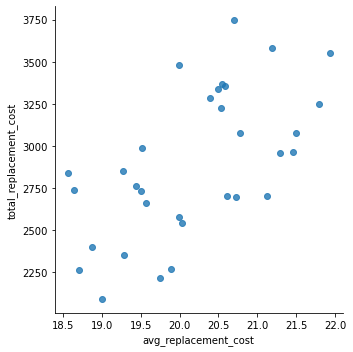

In [40]:
sns.lmplot('avg_replacement_cost', 'total_replacement_cost', data=df, fit_reg=False)

 1.How is the length of the movie related to the movie rating, rental duration and rental rate set by the store? TABLE(s): film


In [41]:
df = pd.read_sql('''
SELECT
	rating AS movie_rating,
	AVG(length) AS avg_movie_length,
    AVG(rental_duration) AS avg_rental_duration,
    AVG(rental_rate) AS avg_rental_rate
FROM film
GROUP BY 1
ORDER BY 2,3;

''', db);


In [42]:
print(df)

  movie_rating  avg_movie_length  avg_rental_duration  avg_rental_rate
0            G          111.0506               4.8371         2.888876
1           PG          112.0052               5.0825         3.051856
2        NC-17          113.2286               5.1429         2.970952
3            R          118.6615               4.7744         2.938718
4        PG-13          120.4439               5.0538         3.034843



-- 3. Which actor has best average rental rate for his/ her movie? -- TABLE(s) film_actor, films

In [43]:
df = pd.read_sql('''
SELECT
	a.actor_id AS actor_id,
    CONCAT(a.first_name,' ',a.last_name) As actor_name,
    AVG(f.rental_rate) AS avg_rental_rate
    
FROM film AS f
	LEFT JOIN film_actor AS fa
		ON fa.film_id = f.film_id
	LEFT JOIN actor AS a
		ON a.actor_id = fa.actor_id
GROUP BY 1
ORDER BY 3 DESC
LIMIT 1;
''', db);


In [44]:
print(df)

   actor_id    actor_name  avg_rental_rate
0       134  GENE HOPKINS         3.808182



-- 4. Which category (genre or rating) of film has the most rentals, and does 
this have to do anything with the length of the film? TABLE(s): category, film, inventory,rental


In [45]:
df = pd.read_sql('''
SELECT
	f.rating AS rating,
	COUNT(DISTINCT r.rental_id) AS number_of_rentals,
    f.length AS film_length
FROM rental AS r
	LEFT JOIN inventory AS i
		ON i.inventory_id = r.inventory_id
	LEFT JOIN film AS f
		ON f.film_id = i.film_id
GROUP BY 
	f.rating,
    f.length
ORDER BY 2 DESC, 3 DESC;
''', db);


In [46]:
print(df)

    rating  number_of_rentals  film_length
0    PG-13                160          178
1    NC-17                107           92
2        R                 98           84
3       PG                 93           85
4       PG                 91          114
..     ...                ...          ...
530      R                  6           60
531      G                  5          180
532  PG-13                  5          125
533  PG-13                  5          115
534     PG                  5           94

[535 rows x 3 columns]


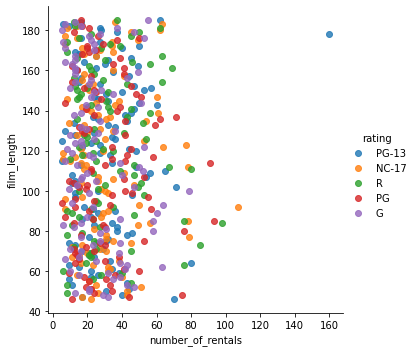

In [47]:
sns.lmplot('number_of_rentals', 'film_length', data=df, hue = 'rating', fit_reg=False)

In [48]:
df = pd.read_sql('''
SELECT
	s.store_id AS store_id,
	c.name AS genre,
    COUNT(DISTINCT r.rental_id) AS rentals,
	SUM(p.amount) AS revenue
FROM store AS s
	LEFT JOIN inventory AS i
		ON i.store_id = s.store_id
	LEFT JOIN film AS f
		ON f.film_id = i.film_id
	LEFT JOIN film_category AS fc
		ON f.film_id = fc.film_id
	LEFT JOIN category As c
		ON fc.category_id = c.category_id
	LEFT JOIN rental AS r
		ON i.inventory_id = r.inventory_id
	LEFT JOIN payment AS p
		ON p.rental_id = r.rental_id
GROUP BY
	s.store_id,
    c.name
ORDER BY 1, 3 DESC,4 DESC;
''', db);


In [49]:
print(df)

    store_id        genre  rentals  revenue
0          1       Action      596  2342.04
1          1        Drama      576  2573.24
2          1    Animation      568  2297.29
3          1       Family      557  2166.44
4          1       Sports      555  2488.46
5          1      Foreign      524  2289.77
6          1       Sci-Fi      521  2203.79
7          1          New      502  2402.98
8          1       Comedy      502  2377.97
9          1        Games      455  2083.46
10         1     Children      453  1758.47
11         1  Documentary      450  1869.51
12         1     Classics      447  1717.51
13         1        Music      436  1795.66
14         1       Travel      395  1640.06
15         1       Horror      386  1673.14
16         2       Sports      624  2825.75
17         2  Documentary      600  2348.01
18         2    Animation      598  2359.01
19         2       Sci-Fi      580  2553.19
20         2       Family      539  2059.63
21         2       Action      5

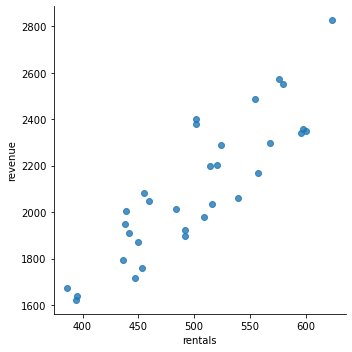

In [50]:
sns.lmplot('rentals', 'revenue', data=df, fit_reg=False)

In [51]:

# disconnect from server
db.close()